In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
DATA_IN_PATH = './data_in/'

train_data = pd.read_csv(DATA_IN_PATH+'train.csv')
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [3]:
print("File Size : ")
for file in os.listdir(DATA_IN_PATH):
    if 'csv' in file and 'zip' not in file:
        print(file.ljust(30)+str(round(os.path.getsize(DATA_IN_PATH+file)/1000000,2))+'MB')
        

File Size : 
sample_submission.csv         22.35MB
test.csv                      477.59MB
train.csv                     63.4MB


In [4]:
print("Training Data : {}".format(len(train_data)))

Training Data : 404290


In [6]:
train_set = pd.Series(train_data['question1'].tolist()+train_data['question2'].tolist()).astype(str)
train_set.head()

0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
dtype: object

In [7]:
print("Total questions : {}".format(len(np.unique(train_set))))
print("Redundant questions : {}".format(np.sum(train_set.value_counts()>1)))

Total questions : 537361
Redundant questions : 111873


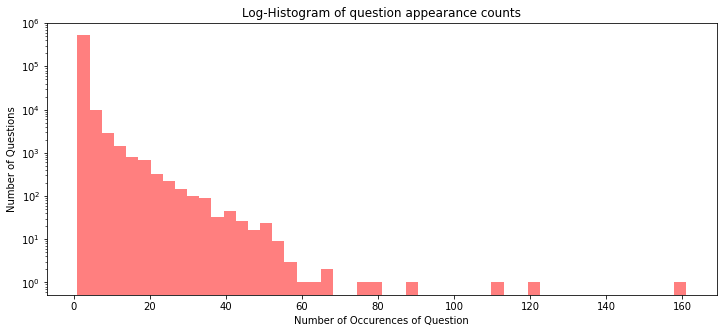

In [10]:
plt.figure(figsize=(12,5))
plt.hist(train_set.value_counts(),bins=50,alpha=0.5,color='r',label='word')
plt.yscale('log',nonpositive='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel("Number of Occurences of Question")
plt.ylabel("Number of Questions")
plt.show()

In [12]:
print("Max Number of Redundancy : {}".format(np.max(train_set.value_counts())))
print("Min Number of Redundancy : {}".format(np.min(train_set.value_counts())))
print("Average Number of Redundancy : {:.2f}".format(np.mean(train_set.value_counts())))
print("Standard Devication of Redundancy : {:.2f}".format(np.std(train_set.value_counts())))
print("Median Number of Redundancy : {}".format(np.median(train_set.value_counts())))
print("1/4 of Redundancy : {}".format(np.percentile(train_set.value_counts(),25)))
print("3/4 of Redundancy : {}".format(np.percentile(train_set.value_counts(),75)))

Max Number of Redundancy : 161
Min Number of Redundancy : 1
Average Number of Redundancy : 1.50
Standard Devication of Redundancy : 1.91
Median Number of Redundancy : 1.0
1/4 of Redundancy : 1.0
3/4 of Redundancy : 1.0


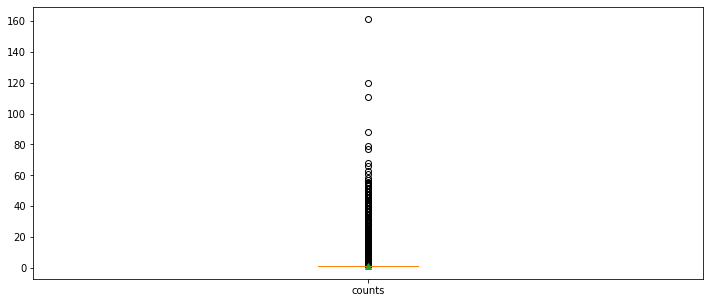

In [14]:
plt.figure(figsize=(12,5))
plt.boxplot([train_set.value_counts()],labels=['counts'],showmeans=True)
plt.show()

(-0.5, 799.5, 599.5, -0.5)

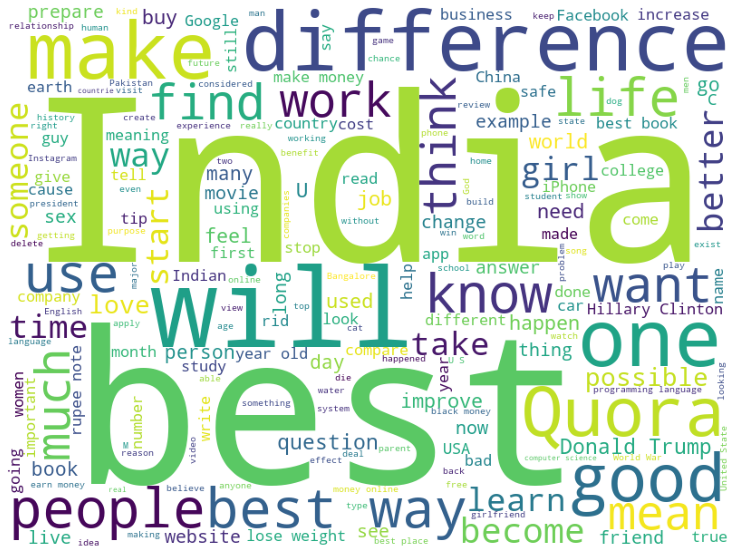

In [17]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
cloud = WordCloud(width=800,height=600,background_color ='white',stopwords=stopwords).generate(" ".join(train_set.astype(str)))
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off')

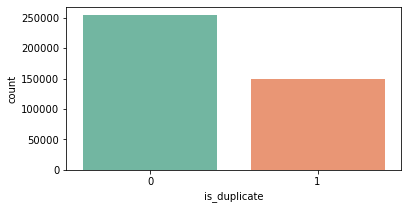

In [19]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(x=train_data['is_duplicate'],ax=axe,palette='Set2')
plt.show()

In [20]:
train_length = train_set.apply(len)

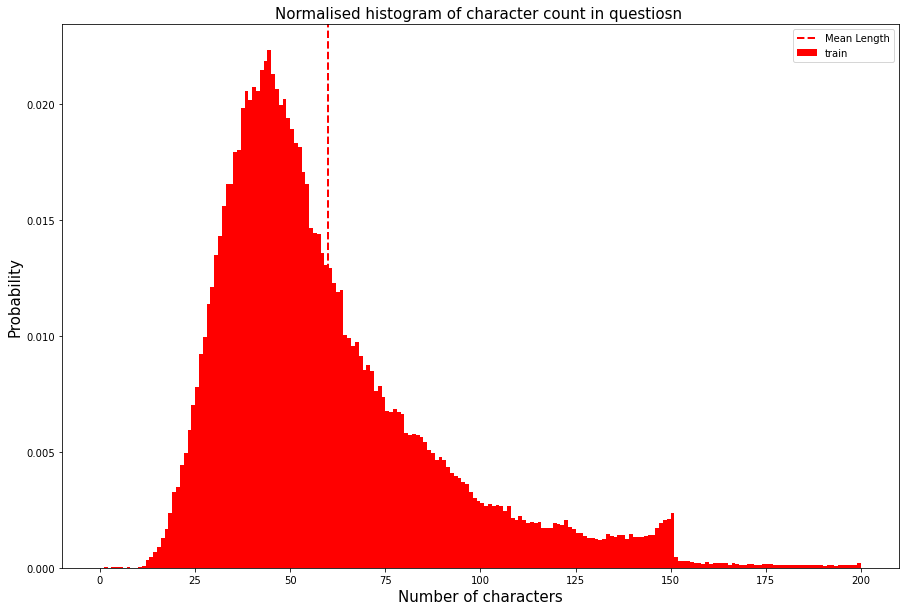

In [22]:
plt.figure(figsize=(15,10))
plt.hist(train_length, bins=200, range=[0,200],facecolor='r',density=True,label='train')
plt.axvline(np.mean(train_length),color='r',linestyle='dashed',linewidth=2,label="Mean Length")
plt.title("Normalised histogram of character count in questiosn ", fontsize=15)
plt.legend()
plt.xlabel("Number of characters",fontsize=15)
plt.ylabel("Probability",fontsize=15)
plt.show()

In [23]:
print('질문 길이 최대 값: {}'.format(np.max(train_length)))
print('질문 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('질문 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('질문 길이 중간 값: {}'.format(np.median(train_length)))
print('질문 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('질문 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

질문 길이 최대 값: 1169
질문 길이 평균 값: 59.82
질문 길이 표준편차: 31.96
질문 길이 중간 값: 51.0
질문 길이 제 1 사분위: 39.0
질문 길이 제 3 사분위: 72.0


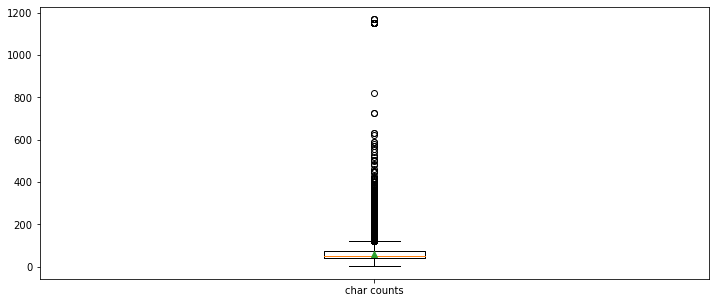

In [24]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_length,
             labels=['char counts'],
             showmeans=True)
plt.show()

In [25]:
train_word_counts = train_set.apply(lambda x : len(x.split(' ')))

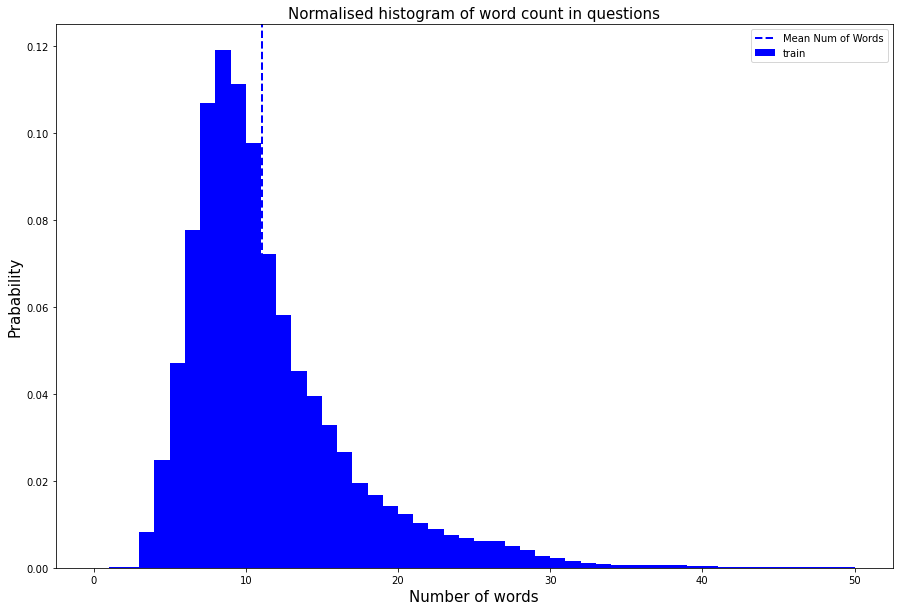

In [27]:
plt.figure(figsize=(15,10))
plt.hist(train_word_counts, bins=50, range=[0,50], facecolor='b',density=True, label='train')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.axvline(np.mean(train_word_counts),color='b',linestyle='dashed',linewidth=2,label="Mean Num of Words")
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Prabability', fontsize=15)
plt.legend()
plt.show()

In [28]:
print('질문 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('질문 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('질문 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('질문 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
print('질문 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('질문 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))
print('질문 단어 개수 99 퍼센트: {}'.format(np.percentile(train_word_counts, 99)))

질문 단어 개수 최대 값: 237
질문 단어 개수 평균 값: 11.06
질문 단어 개수 표준편차: 5.89
질문 단어 개수 중간 값: 10.0
질문 단어 개수 제 1 사분위: 7.0
질문 단어 개수 제 3 사분위: 13.0
질문 단어 개수 99 퍼센트: 31.0


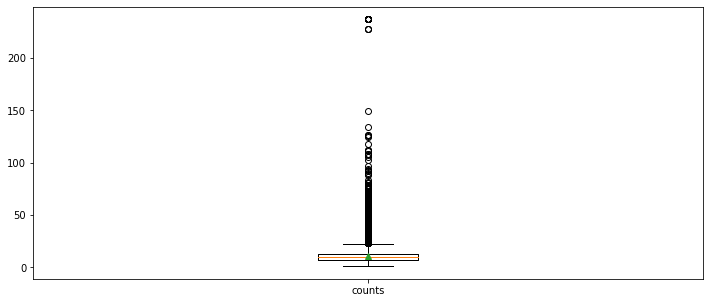

In [29]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_word_counts,
             labels=['counts'],
             showmeans=True)
plt.show()

In [30]:
qmarks = np.mean(train_set.apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
math = np.mean(train_set.apply(lambda x: '[math]' in x)) # []
fullstop = np.mean(train_set.apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(train_set.apply(lambda x: x[0].isupper())) #  첫번째 대문자
capitals = np.mean(train_set.apply(lambda x: max([y.isupper() for y in x]))) # 대문자가 몇개
numbers = np.mean(train_set.apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개
                  
print('물음표가있는 질문: {:.2f}%'.format(qmarks * 100))
print('수학 태그가있는 질문: {:.2f}%'.format(math * 100))
print('마침표를 포함한 질문: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자 인 질문: {:.2f}%'.format(capital_first * 100))
print('대문자가있는 질문: {:.2f}%'.format(capitals * 100))
print('숫자가있는 질문: {:.2f}%'.format(numbers * 100))

물음표가있는 질문: 99.87%
수학 태그가있는 질문: 0.12%
마침표를 포함한 질문: 6.31%
첫 글자가 대문자 인 질문: 99.81%
대문자가있는 질문: 99.95%
숫자가있는 질문: 11.83%
